Name: Advika Udumula
Machine Learning-1: Introduction
Course Code: BUAN302 Section A
Prof. Minati Rath


In [ ]:
 # SECTION 1: Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans

In [ ]:
# Loading the dataset
data = pd.read_excel("/content/Dry_Bean_Dataset.xlsx")

In [ ]:
# SECTION 2: Data Visualisation and Exploration
#Doing a sanity check and summary statistics
print(data.head(2))
print(data.info())
print(data.describe())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength 

In [ ]:
# Class distribution
print(data['Class'].unique())
class_counts = data['Class'].value_counts()
print(class_counts)
class_ratios = data['Class'].value_counts(normalize=True) * 100
print(class_ratios)

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64
Class
DERMASON    26.052458
SIRA        19.366689
SEKER       14.892366
HOROZ       14.165014
CALI        11.975608
BARBUNYA     9.712732
BOMBAY       3.835133
Name: proportion, dtype: float64


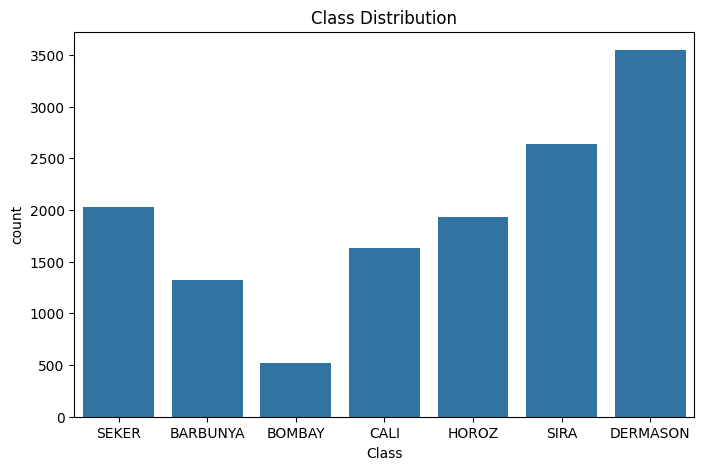

In [ ]:
# Visualising class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

There is a huge imbalance in the classes with 'BOMBAY' at the lowest of 500 units and 'DERMASON' at the highest with over 3500 units.

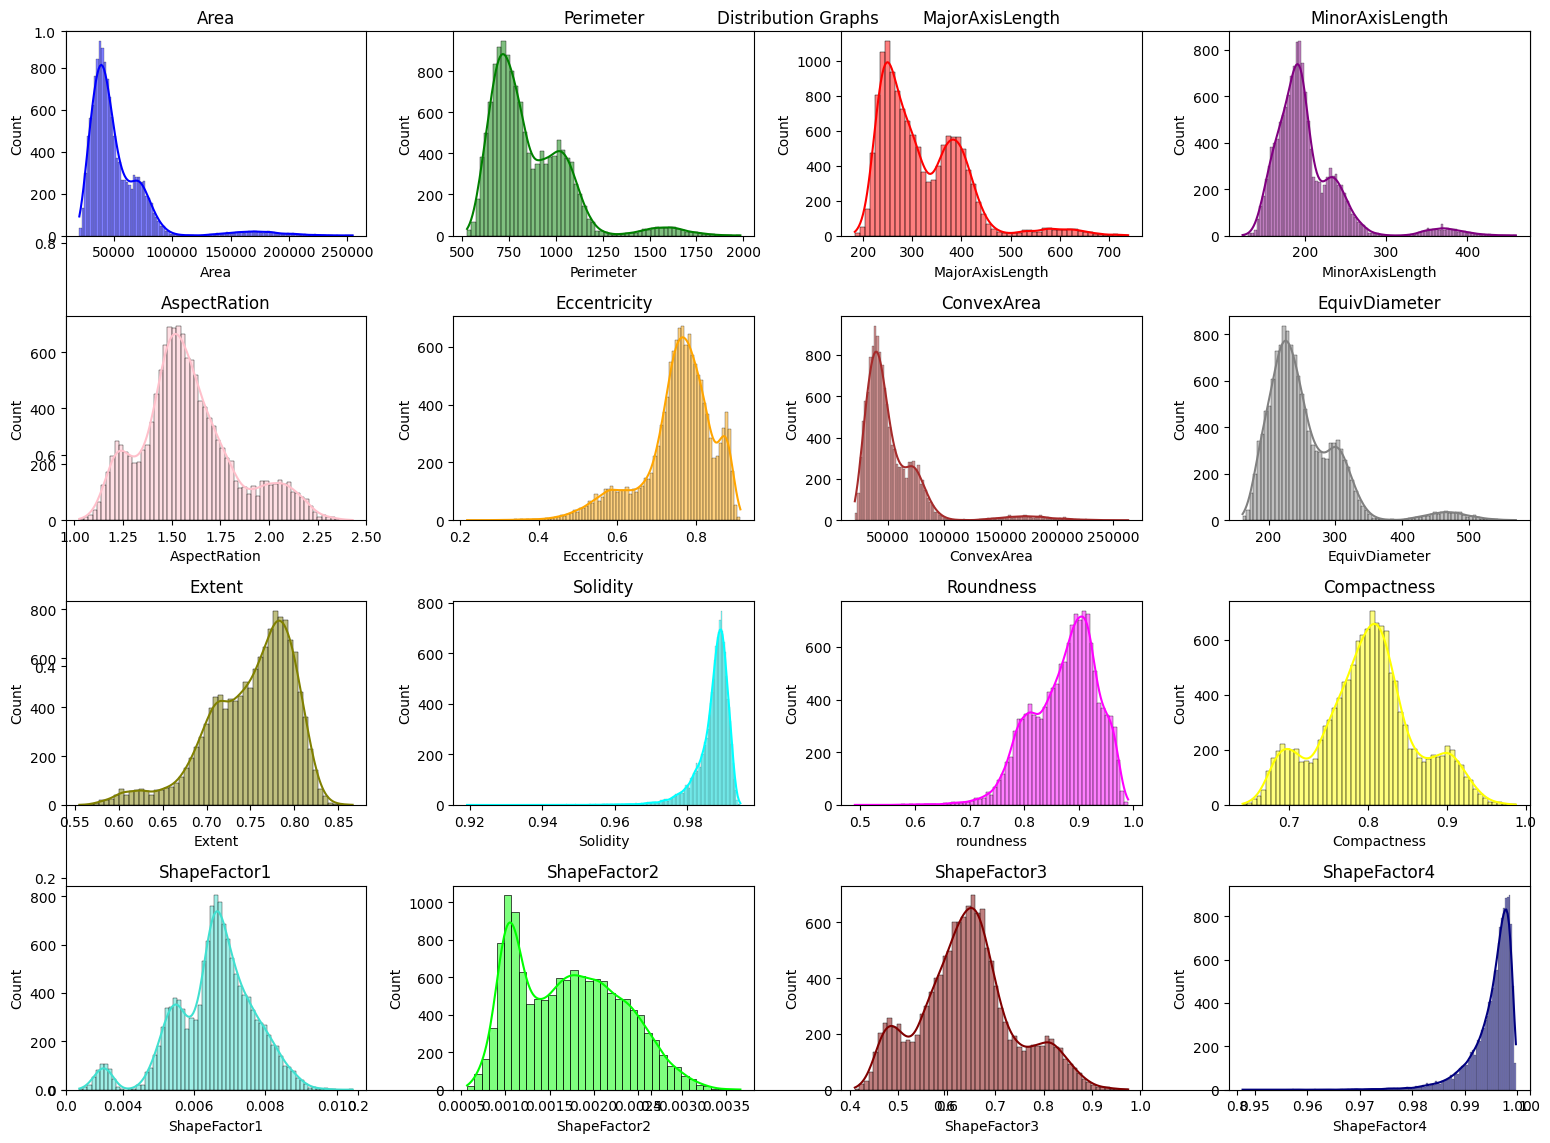

In [ ]:
# Univariate analysis: Distribution of all features
plt.figure(figsize=(16, 12))
plt.title('Distribution Graphs')

# Histograms for all features
plt.subplot(4, 4, 1)
sns.histplot(data['Area'], kde=True, bins='auto', color='blue')
plt.title('Area')

plt.subplot(4, 4, 2)
sns.histplot(data['Perimeter'], kde=True, bins='auto', color='green')
plt.title('Perimeter')

plt.subplot(4, 4, 3)
sns.histplot(data['MajorAxisLength'], kde=True, bins='auto', color='red')
plt.title('MajorAxisLength')

plt.subplot(4, 4, 4)
sns.histplot(data['MinorAxisLength'], kde=True, bins='auto', color='purple')
plt.title('MinorAxisLength')

plt.subplot(4, 4, 5)
sns.histplot(data['AspectRation'], kde=True, bins='auto', color='pink')
plt.title('AspectRation')

plt.subplot(4, 4, 6)
sns.histplot(data['Eccentricity'], kde=True, bins='auto', color='orange')
plt.title('Eccentricity')

plt.subplot(4, 4, 7)
sns.histplot(data['ConvexArea'], kde=True, bins='auto', color='brown')
plt.title('ConvexArea')

plt.subplot(4, 4, 8)
sns.histplot(data['EquivDiameter'], kde=True, bins='auto', color='gray')
plt.title('EquivDiameter')

plt.subplot(4, 4, 9)
sns.histplot(data['Extent'], kde=True, bins='auto', color='olive')
plt.title('Extent')

plt.subplot(4, 4, 10)
sns.histplot(data['Solidity'], kde=True, bins='auto', color='cyan')
plt.title('Solidity')

plt.subplot(4, 4, 11)
sns.histplot(data['roundness'], kde=True, bins='auto', color='magenta')
plt.title('Roundness')

plt.subplot(4, 4, 12)
sns.histplot(data['Compactness'], kde=True, bins='auto', color='yellow')
plt.title('Compactness')

plt.subplot(4, 4, 13)
sns.histplot(data['ShapeFactor1'], kde=True, bins='auto', color='turquoise')
plt.title('ShapeFactor1')

plt.subplot(4, 4, 14)
sns.histplot(data['ShapeFactor2'], kde=True, bins='auto', color='lime')
plt.title('ShapeFactor2')

plt.subplot(4, 4, 15)
sns.histplot(data['ShapeFactor3'], kde=True, bins='auto', color='maroon')
plt.title('ShapeFactor3')

plt.subplot(4, 4, 16)
sns.histplot(data['ShapeFactor4'], kde=True, bins='auto', color='navy')
plt.title('ShapeFactor4')

plt.tight_layout()
plt.show()

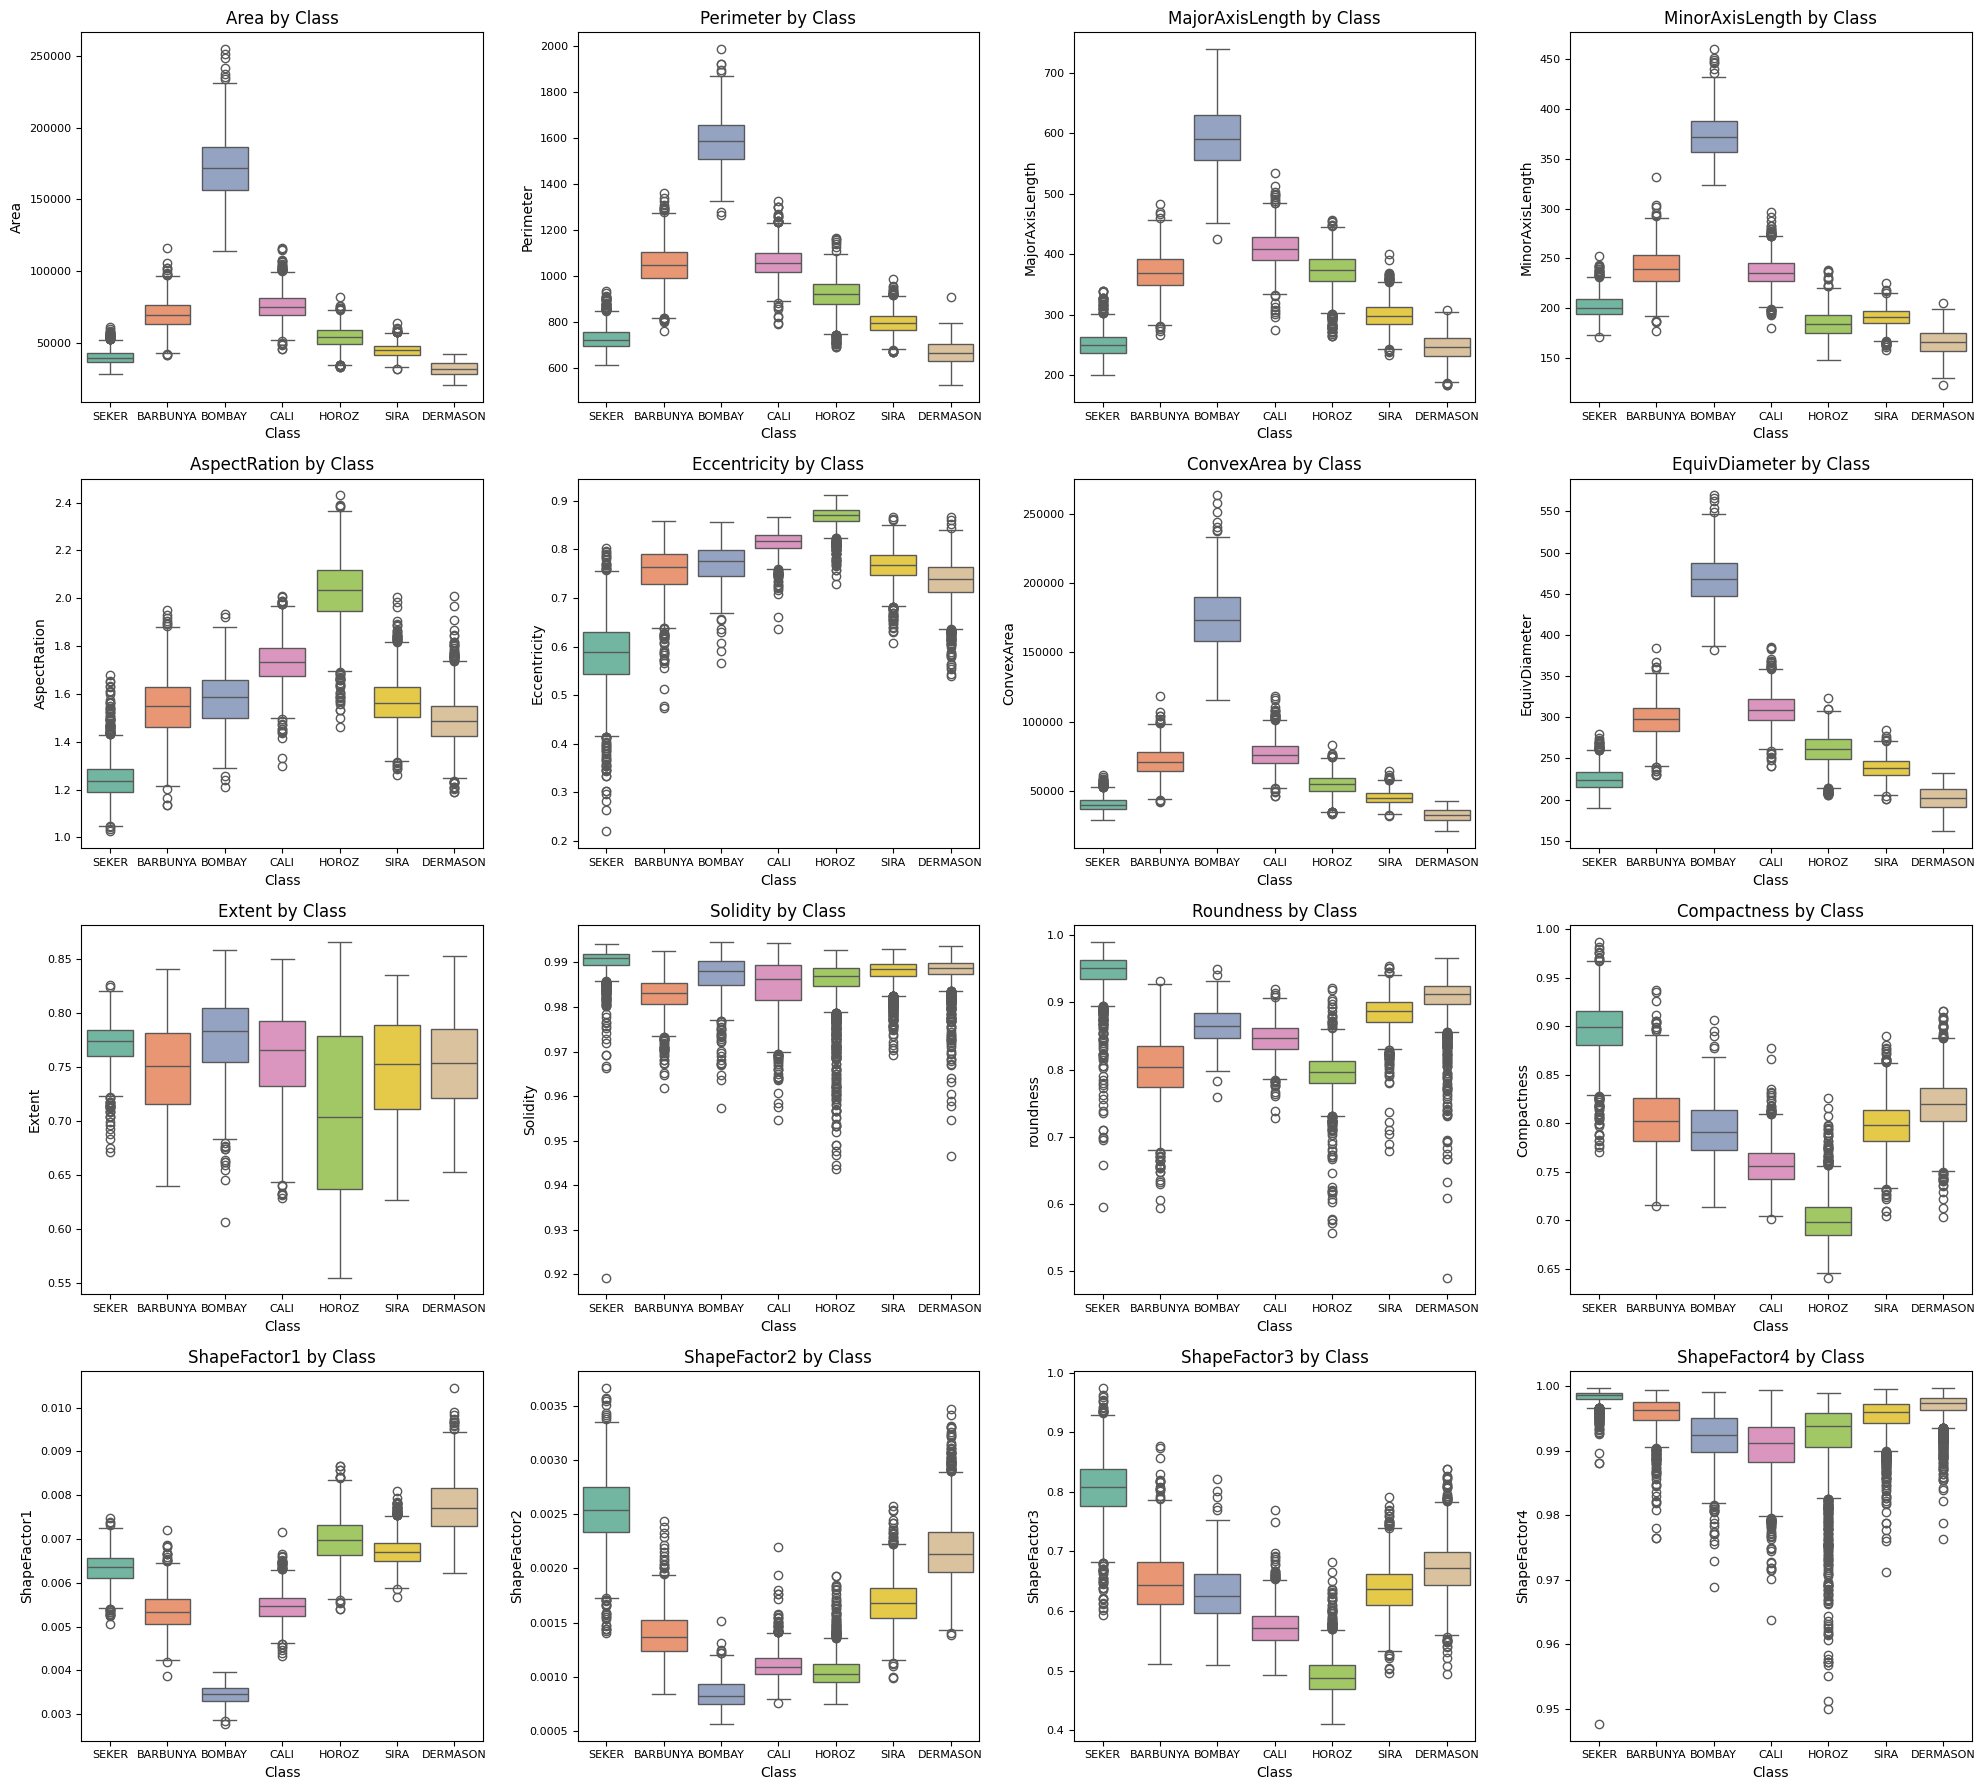

In [ ]:
# Boxplots for feature distribution by class
plt.figure(figsize=(20, 18))
plt.rcParams['axes.labelsize'] = 10  # For x and y-axis labels
plt.rcParams['xtick.labelsize'] = 8  # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 8  # For y-axis tick labels

plt.subplot(4, 4, 1)
sns.boxplot(x='Class', y='Area', data=data, palette='Set2', hue='Class', legend=False)
plt.title('Area by Class')

plt.subplot(4, 4, 2)
sns.boxplot(x='Class', y='Perimeter', data=data, palette='Set2', hue='Class', legend=False)
plt.title('Perimeter by Class')

plt.subplot(4, 4, 3)
sns.boxplot(x='Class', y='MajorAxisLength', data=data, palette='Set2', hue='Class', legend=False)
plt.title('MajorAxisLength by Class')

plt.subplot(4, 4, 4)
sns.boxplot(x='Class', y='MinorAxisLength', data=data, palette='Set2', hue='Class', legend=False)
plt.title('MinorAxisLength by Class')

plt.subplot(4, 4, 5)
sns.boxplot(x='Class', y='AspectRation', data=data, palette='Set2', hue='Class', legend=False)
plt.title('AspectRation by Class')

plt.subplot(4, 4, 6)
sns.boxplot(x='Class', y='Eccentricity', data=data, palette='Set2', hue='Class', legend=False)
plt.title('Eccentricity by Class')

plt.subplot(4, 4, 7)
sns.boxplot(x='Class', y='ConvexArea', data=data, palette='Set2', hue='Class', legend=False)
plt.title('ConvexArea by Class')

plt.subplot(4, 4, 8)
sns.boxplot(x='Class', y='EquivDiameter', data=data, palette='Set2', hue='Class', legend=False)
plt.title('EquivDiameter by Class')

plt.subplot(4, 4, 9)
sns.boxplot(x='Class', y='Extent', data=data, palette='Set2', hue='Class', legend=False)
plt.title('Extent by Class')

plt.subplot(4, 4, 10)
sns.boxplot(x='Class', y='Solidity', data=data, palette='Set2', hue='Class', legend=False)
plt.title('Solidity by Class')

plt.subplot(4, 4, 11)
sns.boxplot(x='Class', y='roundness', data=data, palette='Set2', hue='Class', legend=False)
plt.title('Roundness by Class')

plt.subplot(4, 4, 12)
sns.boxplot(x='Class', y='Compactness', data=data, palette='Set2', hue='Class', legend=False)
plt.title('Compactness by Class')

plt.subplot(4, 4, 13)
sns.boxplot(x='Class', y='ShapeFactor1', data=data, palette='Set2', hue='Class', legend=False)
plt.title('ShapeFactor1 by Class')

plt.subplot(4, 4, 14)
sns.boxplot(x='Class', y='ShapeFactor2', data=data, palette='Set2', hue='Class', legend=False)
plt.title('ShapeFactor2 by Class')

plt.subplot(4, 4, 15)
sns.boxplot(x='Class', y='ShapeFactor3', data=data, palette='Set2', hue='Class', legend=False)
plt.title('ShapeFactor3 by Class')

plt.subplot(4, 4, 16)
sns.boxplot(x='Class', y='ShapeFactor4', data=data, palette='Set2', hue='Class', legend=False)
plt.title('ShapeFactor4 by Class')

plt.tight_layout()
plt.show()

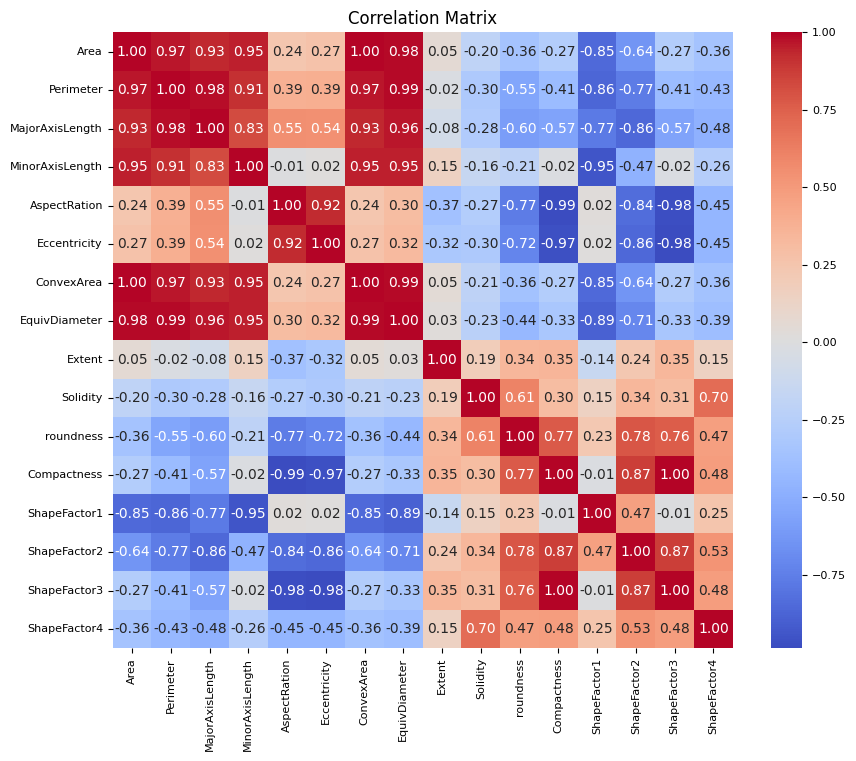

In [ ]:
# Correlation matrix for feature relationships
correlation_matrix = data.drop('Class', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Correlation Analysis
Features like Area, Perimeter, MajorAxisLength, ConvexArea, EquivDiameter have correlations close to 1 (0.97–0.99), suggesting redundancy. So, in this case, we need t0 keep one representative feature and drop the others.
The ShapeFactor features have significant correlations (0.77-0.87), indicating overlap. In this case, I need to choose one or two based on their importance.
Features with large numeric ranges like Area, Perimeter etc are standardised. Features with different ranges but similar measurement units like AspectRation, Solidity etc are normalised.

In [ ]:
# SECTION 3: Data pre-processing and cleaning
# Checking for missing values in the dataset
print(data.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [ ]:
# Removing outliers using the IQR method
exclude_columns = ['Class', 'Area', 'MinorAxisLength']

# Loop through each column in the dataframe except for the excluded ones
for column in data.columns:
    if column not in exclude_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds using 2*IQR method
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR

        # Remove rows where the values are outside the bounds
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Check the cleaned dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11933 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             11933 non-null  int64  
 1   Perimeter        11933 non-null  float64
 2   MajorAxisLength  11933 non-null  float64
 3   MinorAxisLength  11933 non-null  float64
 4   AspectRation     11933 non-null  float64
 5   Eccentricity     11933 non-null  float64
 6   ConvexArea       11933 non-null  int64  
 7   EquivDiameter    11933 non-null  float64
 8   Extent           11933 non-null  float64
 9   Solidity         11933 non-null  float64
 10  roundness        11933 non-null  float64
 11  Compactness      11933 non-null  float64
 12  ShapeFactor1     11933 non-null  float64
 13  ShapeFactor2     11933 non-null  float64
 14  ShapeFactor3     11933 non-null  float64
 15  ShapeFactor4     11933 non-null  float64
 16  Class            11933 non-null  object 
dtypes: float64(14), i

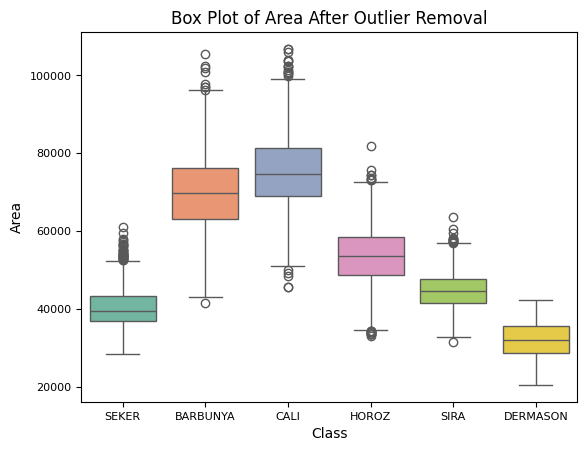

In [ ]:
# Checking to see if there has been a change in the outliers after IQR
sns.boxplot(x='Class', y='Area', data=data, palette='Set2', hue='Class', legend=False)
plt.title('Box Plot of Area After Outlier Removal')
plt.show()

In [ ]:
# Log transformation to reduce skewness in numerical columns
data['Area'] = np.log1p(data['Area'])
data['Perimeter'] = np.log1p(data['Perimeter'])
data['MajorAxisLength'] = np.log1p(data['MajorAxisLength'])
data['MinorAxisLength'] = np.log1p(data['MinorAxisLength'])
data['AspectRation'] = np.log1p(data['AspectRation'])
data['Eccentricity'] = np.log1p(data['Eccentricity'])
data['ConvexArea'] = np.log1p(data['ConvexArea'])
data['EquivDiameter'] = np.log1p(data['EquivDiameter'])
data['Extent'] = np.log1p(data['Extent'])
data['Solidity'] = np.log1p(data['Solidity'])
data['roundness'] = np.log1p(data['roundness'])
data['Compactness'] = np.log1p(data['Compactness'])
data['ShapeFactor1'] = np.log1p(data['ShapeFactor1'])
data['ShapeFactor2'] = np.log1p(data['ShapeFactor2'])
data['ShapeFactor3'] = np.log1p(data['ShapeFactor3'])
data['ShapeFactor4'] = np.log1p(data['ShapeFactor4'])

In [ ]:
# Checking to see which split ratio is the most suitable
# Splitting the data into features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

split_ratios = [0.1, 0.2, 0.3]  # Corresponding to 90-10, 80-20, 70-30 splits
results = []

for ratio in split_ratios:
    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42, stratify=y)

    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)

    # Evaluate performance on test data
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((1 - ratio, ratio, accuracy))

    print(f"Train-Test Split: {int((1 - ratio) * 100)}-{int(ratio * 100)}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Print summary of results
for train_ratio, test_ratio, acc in results:
    print(f"Train-Test Split: {int(train_ratio * 100)}-{int(test_ratio * 100)} | Accuracy: {acc:.2f}")


Train-Test Split: 90-10
Accuracy: 0.8877721943048577
Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.91       120
        CALI       0.92      0.89      0.91       133
    DERMASON       0.89      0.91      0.90       350
       HOROZ       0.93      0.93      0.93       161
       SEKER       0.91      0.92      0.92       170
        SIRA       0.82      0.81      0.81       260

    accuracy                           0.89      1194
   macro avg       0.90      0.89      0.89      1194
weighted avg       0.89      0.89      0.89      1194

Train-Test Split: 80-20
Accuracy: 0.8973607038123167
Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.92      0.88      0.90       240
        CALI       0.88      0.91      0.89       267
    DERMASON       0.90      0.92      0.91       700
       HOROZ       0.95      0.91      0.93       321
       SEKER       0.92      0.9

In [ ]:
# Splitting the data into features (X) and target (y)
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shape of the splits
print("Training set size:", x_train.shape[0])
print("Test set size:", x_test.shape[0])
print("Training class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

Training set size: 9546
Test set size: 2387
Training class distribution:
 Class
DERMASON    0.293421
SIRA        0.217892
SEKER       0.142049
HOROZ       0.134297
CALI        0.111670
BARBUNYA    0.100670
Name: proportion, dtype: float64
Test class distribution:
 Class
DERMASON    0.293255
SIRA        0.217847
SEKER       0.142019
HOROZ       0.134478
CALI        0.111856
BARBUNYA    0.100545
Name: proportion, dtype: float64


We ended up doing a split ratio of 80:20 as it has the most accuracy. In the above trial and error, we can see that the 80-20 split has the highest accuracy with the classification report values not as extreme as the other ratios.

In [ ]:
# Impuing the missing values with the mean
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Train Logistic Regression on the original, unbalanced dataset
clf =  LogisticRegression(random_state=42)
clf.fit(x_train, y_train)

# Predictions and accuracy on the original test data
y_pred = clf.predict(x_test)
original_accuracy = accuracy_score(y_test, y_pred)
print("Original Accuracy: {:.2f}%".format(original_accuracy * 100))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Original Accuracy: 88.48%
Confusion Matrix:
 [[182  36   0   1   3  18]
 [ 10 238   0   4   1  14]
 [  0   0 649   0  12  39]
 [  0  11   2 299   0   9]
 [  0   0  10   0 317  12]
 [  1   1  75   8   8 427]]
Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.94      0.76      0.84       240
        CALI       0.83      0.89      0.86       267
    DERMASON       0.88      0.93      0.90       700
       HOROZ       0.96      0.93      0.94       321
       SEKER       0.93      0.94      0.93       339
        SIRA       0.82      0.82      0.82       520

    accuracy                           0.88      2387
   macro avg       0.89      0.88      0.88      2387
weighted avg       0.89      0.88      0.88      2387



Pre-Processing Steps
1. Check for Null values. No null values so moved on to next step.
2. Dealing with outliers by using the IQR method
3. Using logarithmic transformation to deal with the skewed data since most of it is skewed to the right.
4. Imputing the missing values with the mean

In [ ]:
# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("Features standardized successfully.")

Features standardized successfully.


Standardization which is scaling to have zero mean and unit variance is generally done when features have different scales or units and are used in distance-based models like SVMs or KNN.
Features such as Area, Perimeter, MajorAxisLength, and MinorAxisLength have large numeric ranges (likely measured in lengths, areas).
Compactness, ShapeFactor1-4, and AspectRatio are derived features that may already be normalized or dimensionless, so standardization might not always be required.
Features to Standardize:
Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter
These physical measurements likely differ in scale and need standardization.


In [ ]:
# Exploring PCA to reduce dimensionality
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.60417075 0.2309343 ]


PCA is performed to reduce dimensionality and is usually done on scaled data. We are doing this to identify the principal components, which are linear combinations of the original features. This is done becuase we are dealing with a large dataset and we want to reduce computational expenses and error rates. We are doing this after scaling as it ensures that all features have a similar range. This is crucial for PCA, as it prevents features with larger scales from dominating the analysis.
By scaling the data, we are ensuring that all features contribute equally to the PCA analysis, leading to more accurate and meaningful results.


In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train_pca, y_train)

# Train Logistic Regression on the SMOTE-resampled dataset
clf_smote = LogisticRegression(random_state=42)
clf_smote.fit(x_resampled, y_resampled)

# Predictions and accuracy on the SMOTE-resampled test data
y_pred_smote = clf_smote.predict(x_test_pca)
smote_accuracy = accuracy_score(y_test, y_pred_smote)
print("SMOTE Accuracy: {:.2f}%".format(smote_accuracy * 100))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

SMOTE Accuracy: 87.01%
Confusion Matrix:
 [[161  67   0   0   3   9]
 [ 46 214   0   3   2   2]
 [  0   0 626   1  12  61]
 [  0  10   1 302   0   8]
 [  1   0   7   0 322   9]
 [  5   1  36  18   8 452]]
Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.76      0.67      0.71       240
        CALI       0.73      0.80      0.77       267
    DERMASON       0.93      0.89      0.91       700
       HOROZ       0.93      0.94      0.94       321
       SEKER       0.93      0.95      0.94       339
        SIRA       0.84      0.87      0.85       520

    accuracy                           0.87      2387
   macro avg       0.85      0.85      0.85      2387
weighted avg       0.87      0.87      0.87      2387



Since there's a huge class imbalance, we are applying smote to balance the dataset. This si to ensure that the models won't be biased towards majority class. It also reduces the risk of overfitting as it doesn't duplicate samples but generates synthetic samples.

Change in accuracy after applying SMOTE: -1.47%


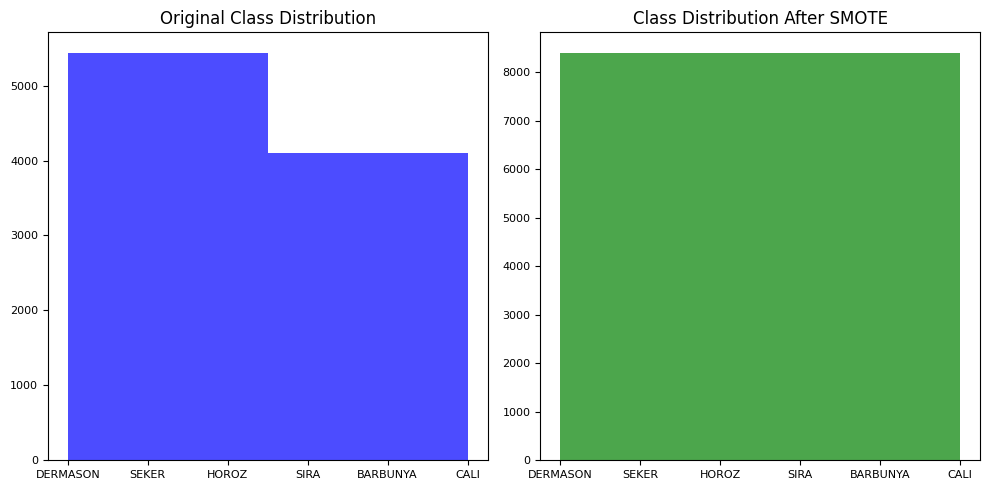

In [ ]:
# Compare the accuracy before and after applying SMOTE
print("Change in accuracy after applying SMOTE: {:.2f}%".format((smote_accuracy - original_accuracy) * 100))

# Visualizing the class distribution before and after SMOTE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Class Distribution')
plt.hist(y_train, bins=2, color='blue', alpha=0.7)

plt.subplot(1, 2, 2)
plt.title('Class Distribution After SMOTE')
plt.hist(y_resampled, bins=2, color='green', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# SECTION 4: Model Building
# SVM MODEL with K-fold cross validation
svm_model = SVC(kernel='linear', random_state=42)
k = 5  # Number of folds (common)

# Performing k-fold cross-validation
scores = cross_val_score(svm_model, x_resampled, y_resampled, cv=k, scoring='accuracy')

print(f"{k}-Fold Cross-Validation Scores:", scores)
print(f"Mean Accuracy: {scores.mean():.2f}, Standard Deviation: {scores.std():.2f}")

svm_model.fit(x_resampled, y_resampled)

5-Fold Cross-Validation Scores: [0.85752528 0.83695329 0.85629277 0.85897054 0.85540018]
Mean Accuracy: 0.85, Standard Deviation: 0.01


SVC(kernel='linear', random_state=42)

In [ ]:
# SECTION 5: Performance evaluation of SVM
y_pred_svm = svm_model.predict(x_test_pca)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
svm_recall = recall_score(y_test, y_pred_svm, average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Display the results
print("SVM Model Performance:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-Score: {svm_f1:.2f}")
print("Confusion Matrix:\n", svm_conf_matrix)

SVM Model Performance:
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-Score: 0.87
Confusion Matrix:
 [[161  70   0   0   2   7]
 [ 43 216   0   3   3   2]
 [  0   0 630   1   9  60]
 [  0  10   1 302   0   8]
 [  1   0   7   0 322   9]
 [  6   1  42  12   8 451]]


Accuracy: 0.87

Precision, Recall, and F1-Score: 0.87

Confusion Matrix: Indicates relatively balanced performance, with some misclassifications in certain classes.

Pros: The SVM provides consistent evaluation metrics (Precision, Recall, and F1-Score), suggesting that it maintains a good balance between false positives and false negatives.

Cons: No indication of how it handles class imbalance; all metrics are the same, indicating it may not excel in capturing minority classes.

Observation: The SVM shows no significant signs of underfitting or overfitting. However, it might not capture minority class variations effectively.

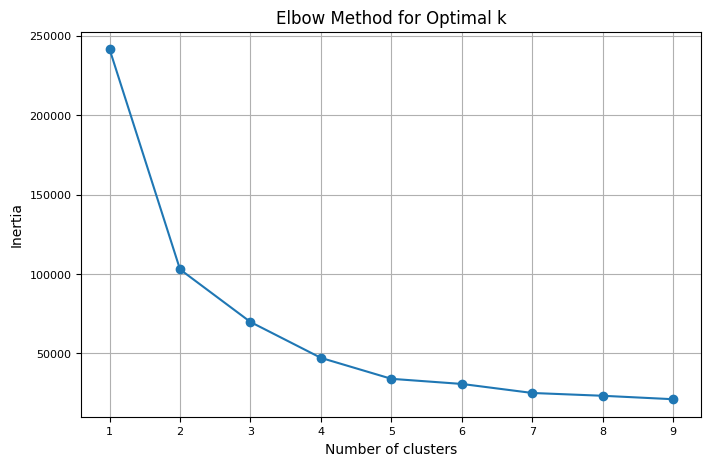

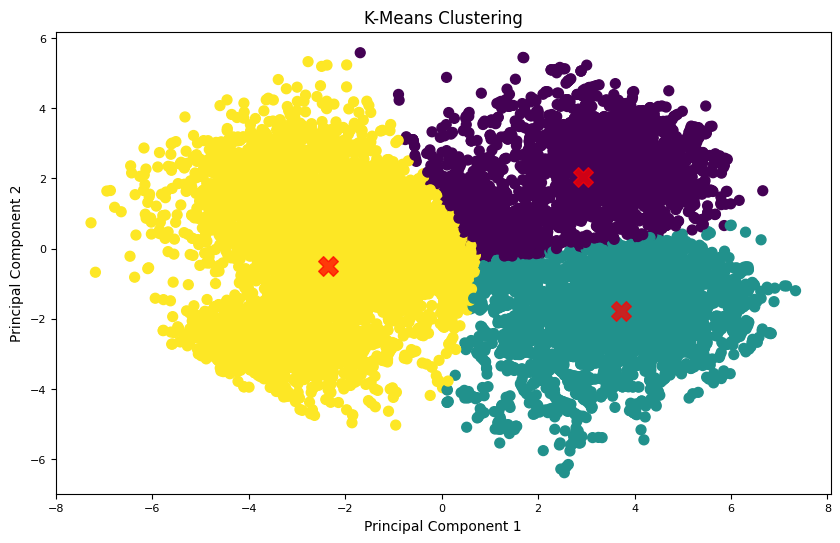

Silhouette Score (K-means): 0.48


In [ ]:
# SECTION 4: K-Means Model Building
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_resampled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Fit KMeans with the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(x_resampled)
y_kmeans = kmeans.predict(x_resampled)

# Plotting the clusters using the selected features
plt.figure(figsize=(10, 6))
plt.scatter(x_resampled[:, 0], x_resampled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Predicting cluster labels
cluster_labels = kmeans.predict(x_resampled)

# Computing Silhouette Score (higher score means better clusters)
sil_score = silhouette_score(x_resampled, cluster_labels)
print(f"Silhouette Score (K-means): {sil_score:.2f}")



Cohesion (Inertia): 69802.44
Separation (Sum of distances between cluster centers): 15.96
Silhouette Coefficient: 0.48


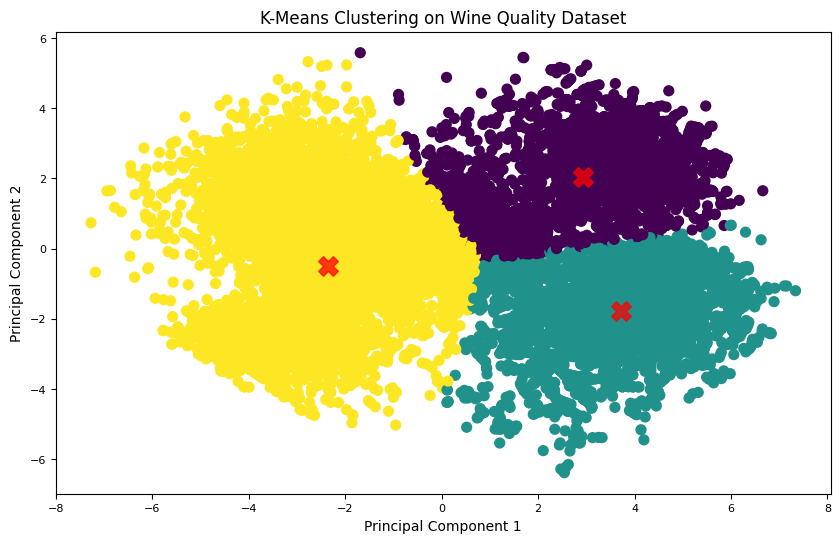

In [ ]:
# Calculate Cohesion (Within-cluster sum of squares)
cohesion = kmeans.inertia_

# Calculate Separation (between-cluster distance)
# Get the cluster centers
centers = kmeans.cluster_centers_
# Calculate distances between centers
separation = 0
for i in range(optimal_k):
    for j in range(i + 1, optimal_k):
        separation += np.linalg.norm(centers[i] - centers[j])

# Calculate Silhouette Coefficient
silhouette_avg = silhouette_score(x_resampled, y_kmeans)

# Print the metrics
print(f"Cohesion (Inertia): {cohesion:.2f}")
print(f"Separation (Sum of distances between cluster centers): {separation:.2f}")
print(f"Silhouette Coefficient: {silhouette_avg:.2f}")

# Plotting the clusters using two features for visualization
plt.figure(figsize=(10, 6))
plt.scatter(x_resampled[:, 0], x_resampled[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Silhouette Score: 0.48 (below 0.5 indicates moderate clustering quality).

Cohesion (Inertia): 69802.44 (low cohesion within clusters suggests the clusters are not very tight).

Separation: 15.96 (higher separation is desirable for distinct clusters).

Pros: Clustering is moderately useful for unsupervised learning tasks.

Cons: Silhouette Score is not high enough to suggest strong cluster separation.

In [ ]:
#  SECTION 4: Decision Tree Model Building
simple_tree = DecisionTreeClassifier(random_state=42)
simple_tree.fit(x_resampled, y_resampled)

# Predictions and accuracy for Simple Tree
y_pred_simple = simple_tree.predict(x_test_pca)
accuracy_simple = accuracy_score(y_test, y_pred)
print(f'Simple Tree Accuracy: {accuracy_simple:.3f}')

#Pre-pruned Decision Tree
pre_pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pre_pruned_tree.fit(x_resampled, y_resampled)

# Predictions and accuracy for Pre-pruned Tree
y_pred_pre_pruned = pre_pruned_tree.predict(x_test_pca)
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
print(f'Pre-pruned Tree Accuracy: {accuracy_pre_pruned:.3f}')

Simple Tree Accuracy: 0.885
Pre-pruned Tree Accuracy: 0.819


In [ ]:
# Post-pruned Decision Tree (Cost Complexity Pruning)
# First, we fit a large tree with no restrictions
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_resampled, y_resampled)

# Get the effective alphas for post-pruning
path = clf.cost_complexity_pruning_path(x_resampled, y_resampled)
ccp_alphas = path.ccp_alphas

# Train different models for each alpha (pruning strength)
post_pruned_trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(x_resampled, y_resampled)
    post_pruned_trees.append(tree)

In [ ]:
# Evaluate the accuracy of each post-pruned tree
test_scores = [accuracy_score(y_test, tree.predict(x_test_pca)) for tree in post_pruned_trees]

# Select the best post-pruned tree (based on the alpha that gives the highest test accuracy)
best_tree_index = test_scores.index(max(test_scores))
best_post_pruned_tree = post_pruned_trees[best_tree_index]

# Predictions and accuracy for Post-pruned Tree
y_pred_post_pruned = best_post_pruned_tree.predict(x_test_pca)
accuracy_post_pruned = accuracy_score(y_test, y_pred_post_pruned)
print(f'Best Post-pruned Tree Accuracy: {accuracy_post_pruned:.3f}')

Best Post-pruned Tree Accuracy: 0.867


In [ ]:
# SECTION 5: Performance Evaluation of Decision Tree
def print_classification_metrics(model, x_test_pca, y_test, model_name):

# Predict the labels
    y_pred = model.predict(x_test_pca)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Handle ROC AUC calculation for multi-class classification
    if len(np.unique(y_test)) > 2:  # Multi-class classification
        # Get the predicted probabilities
        y_prob = model.predict_proba(x_test_pca)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
    else:
        # Binary classification
        roc_auc = roc_auc_score(y_test, model.predict_proba(x_test_pca)[:, 1])

    # Calculate confusion matrix and derive specificity and sensitivity
    cm = confusion_matrix(y_test, y_pred)
    if cm.size == (2, 2):  # Binary classification
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    else:
        # For multi-class confusion matrix, sensitivity and specificity calculations would differ
        sensitivity = []
        specificity = []

# Compute sensitivity and specificity per class
        for i in range(cm.shape[0]):
            tp = cm[i, i]
            fn = cm[i, :].sum() - tp
            fp = cm[:, i].sum() - tp
            tn = cm.sum() - (tp + fn + fp)

            # Sensitivity (Recall for the class)
            sensitivity.append(tp / (tp + fn) if (tp + fn) > 0 else np.nan)

            # Specificity (True Negative Rate)
            specificity.append(tn / (tn + fp) if (tn + fp) > 0 else np.nan)

        sensitivity = np.mean(sensitivity)
        specificity = np.mean(specificity)

    # Print metrics
    print(f'{model_name} Metrics:')
    print(f'  Accuracy: {accuracy:.3f}')
    print(f'  Precision: {precision:.3f}')
    print(f'  Recall: {recall:.3f}')
    print(f'  F1 Score: {f1:.3f}')
    print(f'  Sensitivity: {sensitivity:.3f}')
    print(f'  Specificity: {specificity:.3f}')
    print(f'  ROC AUC: {roc_auc:.3f}')
    print()

    # For Simple Tree
print_classification_metrics(simple_tree, x_test_pca, y_test, 'Simple Decision Tree')

# For Pre-pruned Tree
print_classification_metrics(pre_pruned_tree, x_test_pca, y_test, 'Pre-pruned Decision Tree')

# For Post-pruned Tree
print_classification_metrics(best_post_pruned_tree, x_test_pca, y_test, 'Post-pruned Decision Tree')

Simple Decision Tree Metrics:
  Accuracy: 0.816
  Precision: 0.817
  Recall: 0.816
  F1 Score: 0.816
  Sensitivity: 0.790
  Specificity: 0.963
  ROC AUC: 0.888

Pre-pruned Decision Tree Metrics:
  Accuracy: 0.819
  Precision: 0.835
  Recall: 0.819
  F1 Score: 0.817
  Sensitivity: 0.797
  Specificity: 0.964
  ROC AUC: 0.948

Post-pruned Decision Tree Metrics:
  Accuracy: 0.867
  Precision: 0.867
  Recall: 0.867
  F1 Score: 0.867
  Sensitivity: 0.851
  Specificity: 0.973
  ROC AUC: 0.978



**Simple Tree:**

Accuracy: 0.816, Sensitivity: 0.79, Specificity: 0.963, ROC AUC: 0.888

**Pros:** Decent accuracy, good specificity, and a reasonable ROC AUC score.

**Cons:** Slightly lower sensitivity, indicating it may miss some positive cases.

**Observation:** The simple tree likely overfits the training data, as indicated by its high specificity but comparatively lower sensitivity. Overfitting is common in decision trees without pruning.

**Pre-pruned Tree:**

Accuracy: 0.819, ROC AUC: 0.948

**Pros:** Higher ROC AUC compared to the simple tree, better handling of overfitting.

**Cons:** Accuracy is slightly lower compared to the simple and post-pruned models.

**Observation:** Pruning controls overfitting, but this model may slightly underfit as accuracy is lower compared to other models.

**Post-pruned Tree:**

Accuracy: 0.867, ROC AUC: 0.978

**Pros:** The highest ROC AUC, balancing sensitivity (0.851) and specificity (0.973). It provides better generalization compared to other tree models.

**Cons:** Slightly lower accuracy than the SVM.

**Observation:** This model represents a just-right fit, as it balances training and test performance with good generalization.


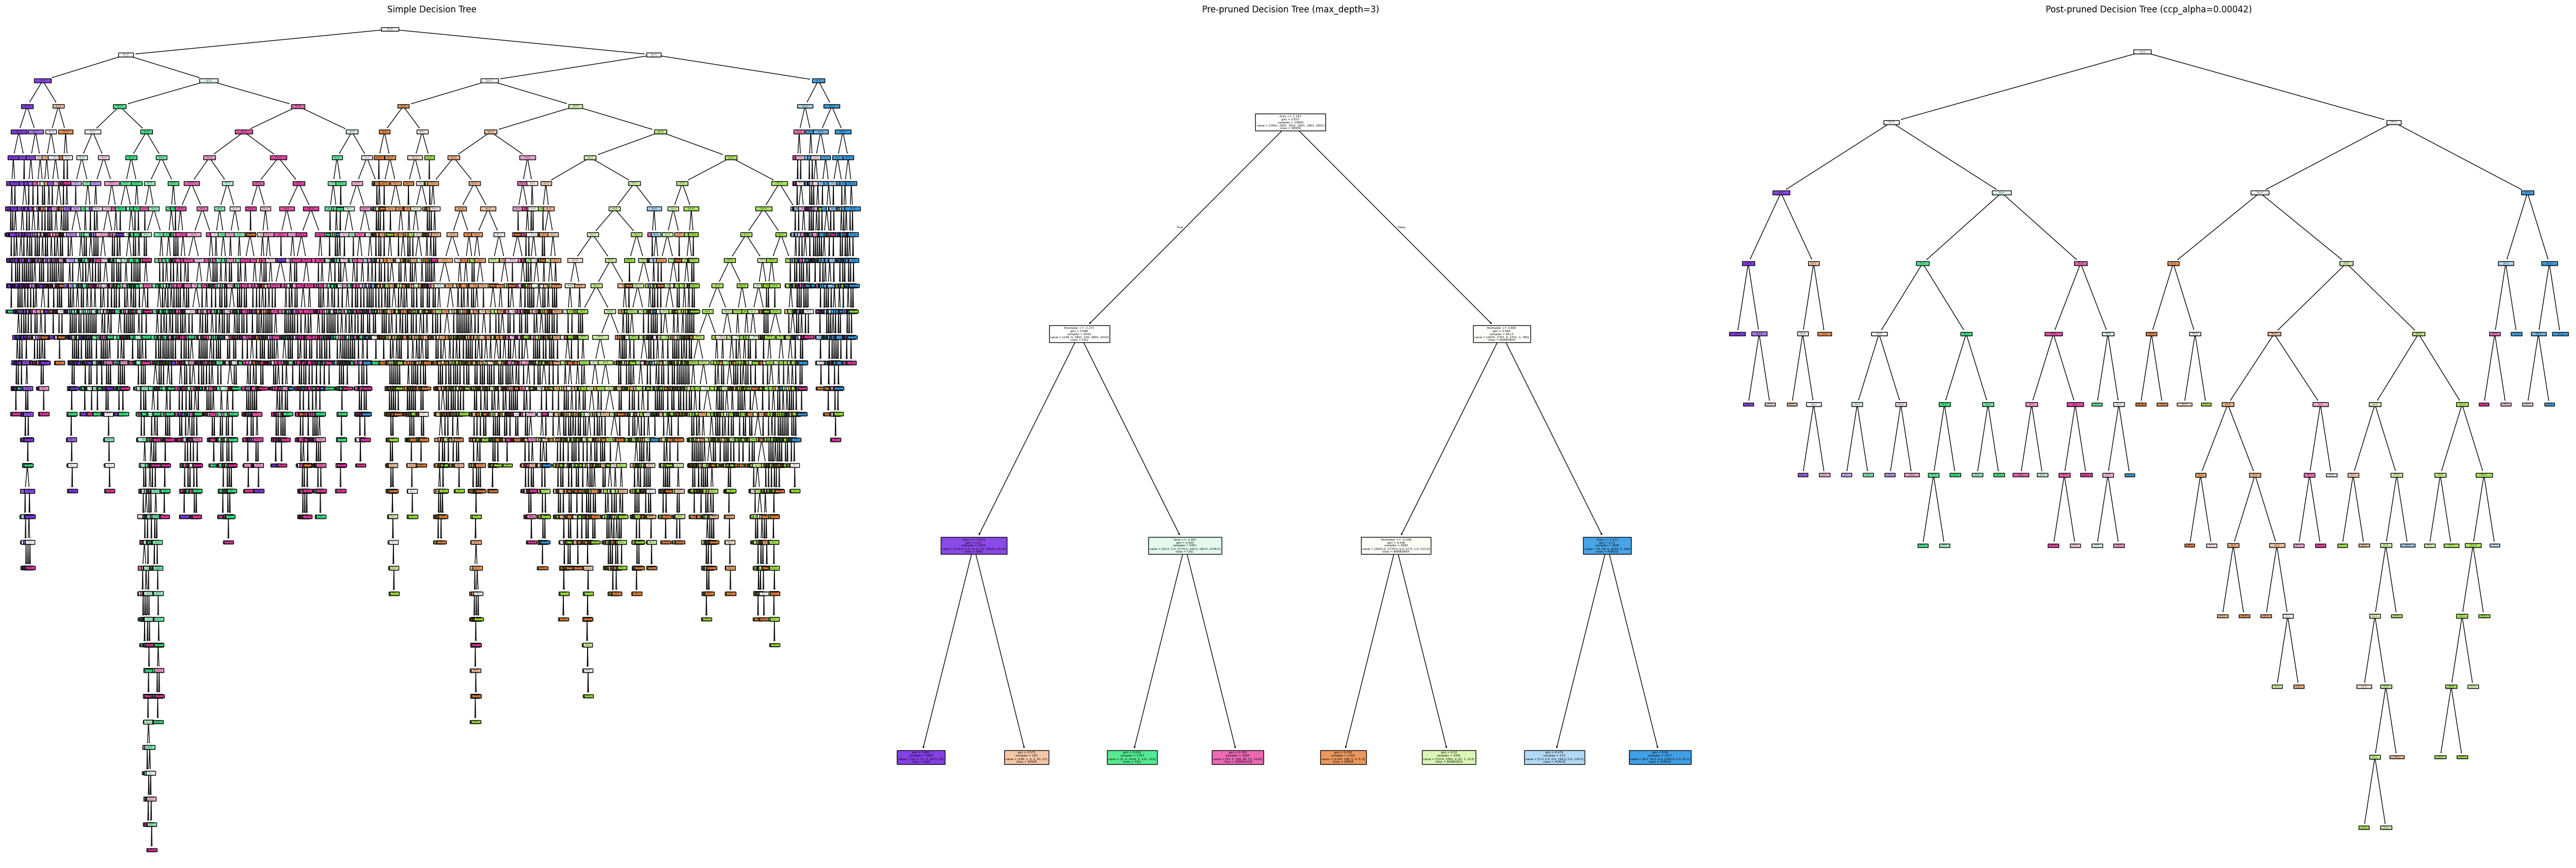

In [ ]:
plt.figure(figsize=(50, 50))

# Plot Simple Tree
plt.subplot(3, 3, 1)
plot_tree(simple_tree, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title('Simple Decision Tree')

# Plot Pre-pruned Tree
plt.subplot(3, 3, 2)
plot_tree(pre_pruned_tree, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title('Pre-pruned Decision Tree (max_depth=3)')

# Plot Post-pruned Tree
plt.subplot(3, 3, 3)
plot_tree(best_post_pruned_tree, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title(f'Post-pruned Decision Tree (ccp_alpha={ccp_alphas[best_tree_index]:.5f})')

# Show all plots together
plt.tight_layout()
plt.show()


My problem statement is to classify the different varieties of dry beansbased on their features. It is a multi class classification problem as we will be predicting one of many possible categories.


The Post-pruned Decision Tree emerges as the best model for this dataset due to:
Highest ROC AUC (0.978), which captures its superior ability to distinguish between classes across thresholds.
Balanced trade-off between sensitivity (0.851) and specificity (0.973), minimizing false negatives and false positives.

Relatively high accuracy (0.867) and F1-Score (0.867), indicating balanced performance across all classes.
While the SVM achieves similar accuracy, it lacks the ability to explain its decisions, which is a strength of the Decision Tree. Additionally, the Decision Tree's higher ROC AUC and balanced sensitivity/specificity make it more robust.

The post-pruned decision tree has superior metrics and interpretability.